# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

*Indique o link da base no Kaggle e explique em um parágrafo curto por que essa base é interessante para você.*

https://www.kaggle.com/jboysen/injured-workers

Escolhi esta base de dados porque contém dados de acidentes do trabalho, área em que tenho familiaridade pois poussuo uma empresa de presetação de serviços (www.erplan.com.br) que tem como principal produto um software de gestão de Saúde, Segurança do Trabalho, Meio Ambiente e Qualidade.

Apesar dos dados desta base refletirem uma realidade distante da brasileira, quero investigar justamente as características da base de dados, que conta com um volume razoável de informações brutas (26 colunas x 22.000 linhas), com acidentes graves de trabalho - amputação, fraturas, queimaduras etc.) entre 1/1/2015 e 28/2/2017 em 4.643 cidades dos Estados Unidos nos 54 estados dos Estados Unidos.

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt # visualização de dados
import numpy as np # linear algebra
import pandas as pd # data processing
from geopy.geocoders import Nominatim as geo # geoprocessamento
import geopandas # Plotagem no mapa




In [2]:
df = pd.read_csv("database/severeinjury.csv", 
     engine='python')


df.head(5)

,ID,UPA,EventDate,Employer,Address1,Address2,City,State,Zip,Latitude,...,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,2015010015,931176,1/1/2015,FCI Otisville Federal Correctional Institution,Two Mile Drive,NaN,OTISVILLE,NEW YORK,10963.0,41.46,...,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,2015010016,930267,1/1/2015,Kalahari Manufacturing LLC,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,53940.0,43.59,...,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,2015010018,929823,1/1/2015,Schneider National Bulk Carrier,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,15108.0,40.49,...,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,2015010019,929711,1/1/2015,PEPSI BOTTLING GROUP INC.,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,31206.0,32.77,...,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,2015010020,929642,1/1/2015,North American Pipe Corporation,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,53545.0,42.67,...,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- Identificação da variável a serem trabalhadas
- Classificação das variáveis como: contínua ou discreta.


In [3]:
df.columns

Index(['ID', 'UPA', 'EventDate', 'Employer', 'Address1', 'Address2', 'City',
       'State', 'Zip', 'Latitude', 'Longitude', 'Primary NAICS',
       'Hospitalized', 'Amputation', 'Inspection', 'Final Narrative', 'Nature',
       'NatureTitle', 'Part of Body', 'Part of Body Title', 'Event',
       'EventTitle', 'Source', 'SourceTitle', 'Secondary Source',
       'Secondary Source Title'],
      dtype='object')

*Descrição da base e suas variáveis*

É um banco com dados de acidentes graves de trabalho, com detalhamento da gravidade do acidente, parte do corpo atingida, natureza da lesão e também informações demográficas, especialmente cidade e estado, permitindo comparações das features de gravidade dos acidentes em relação aos estados e cidades.



### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.




Consultando linhas e colunas

In [4]:
df.shape

(21578, 26)

A base contém 21.578 linhas e 26 colunas

Colunas: 
- (-) ID: Identificador chave PK da linha, irrelevante para estatística
- (-) UPA: Valor numérico não identificado
- (+) EventDate: Data do incidente/acidente
- (-) Employer: Nome da empresa contratatante
- (-) Address1: Endereço do empregado
- (-) Address2: Continuação do endereço
- (+) City: Cidade
- (+) State: Estado
- (-) Zip: CEP
- (+) Latitude
- (+) Longitude
- (-) Primay NAICS (Numérico não identificado)
- (+) Hospitalized (Binário)
- (+) Amputation (Binário)
- (-) Inspection (Numérico) - Código
- (-) Final Narrative (Descrição)
- (+) Nature (Código da Natureza)
- (+) Nature Title
- (+) Part of Body (Código da parte do corpo)
- (+) Part of Body Title
- (+) Event (Código do evento)
- (+) Event Title
- (+) Source (Código da Fonte)
- (+) Source title
- (+) Secondary Source (Código da fonte secundária)
- (+) Secondary Source Title

Das 26 colunas, 17 serão utilizadas (+), sendo as últimas 10 são informações repetidas (código/descrição).
As colunas marcadas com (-) não serão utilizadas na análise.
Há necessidades de colunas adicionais auxiliares como quebrar EventDate em Dia, mês e ano e dia da semana.

Dropando as colunas desnecessárias, exceto Endereço, por enquanto

Verificarndo que não há muitos dados únicos relevantes de empregadores, desprezando também

df['Employer'].describe()

In [5]:
df=df.drop(['ID', 'UPA', 'Employer', 'Zip','Primary NAICS','Inspection', 'Final Narrative'],axis = 1)

Mostrando as colunas resultantes

In [6]:
df.columns

Index(['EventDate', 'Address1', 'Address2', 'City', 'State', 'Latitude',
       'Longitude', 'Hospitalized', 'Amputation', 'Nature', 'NatureTitle',
       'Part of Body', 'Part of Body Title', 'Event', 'EventTitle', 'Source',
       'SourceTitle', 'Secondary Source', 'Secondary Source Title'],
      dtype='object')

Mostrando os tipos existentes

In [7]:
df.dtypes

EventDate                  object
Address1                   object
Address2                   object
City                       object
State                      object
Latitude                  float64
Longitude                 float64
Hospitalized              float64
Amputation                float64
Nature                      int64
NatureTitle                object
Part of Body                int64
Part of Body Title         object
Event                       int64
EventTitle                 object
Source                      int64
SourceTitle                object
Secondary Source          float64
Secondary Source Title     object
dtype: object

Informações importantes sobre o dataframe para Insights

In [8]:
df.describe()

,Latitude,Longitude,Hospitalized,Amputation,Nature,Part of Body,Event,Source,Secondary Source
count,21487.000000,21487.000000,21578.000000,21576.000000,21578.000000,21578.000000,21578.000000,21578.000000,5812.000000
mean,36.722735,-87.691200,0.807999,0.269837,886.975206,2282.536055,3905.397071,4811.297618,5210.936855
std,5.500293,11.132113,0.412055,0.451033,779.275403,2796.269288,2523.757451,2882.715191,3227.633387
min,-15.780000,-170.710000,0.000000,0.000000,7.000000,6.000000,20.000000,10.000000,10.000000
25%,32.200000,-95.400000,1.000000,0.000000,111.000000,320.000000,642.000000,3230.000000,2214.000000
50%,38.770000,-87.660000,1.000000,0.000000,1311.000000,513.000000,4331.000000,4153.500000,4418.000000
75%,41.090000,-80.625000,1.000000,1.000000,1312.000000,4422.000000,6252.000000,7124.000000,8621.000000
max,61.290000,145.750000,3.000000,9.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000


Analisando individualmente algumas colunas

In [9]:
df["City"].describe()

count       21569
unique       4642
top       HOUSTON
freq          403
Name: City, dtype: object

In [10]:
df["Part of Body"].describe()

count    21578.000000
mean      2282.536055
std       2796.269288
min          6.000000
25%        320.000000
50%        513.000000
75%       4422.000000
max       9999.000000
Name: Part of Body, dtype: float64

Valores únicos de Origem do Acidente

In [11]:
len (df["Source"].unique())

903

Encontradas 903 fontes diferentes na base 

Verificando se há valores nulos em algum lugar que possam ser substituídos

Gerando um novo dataframe só com os valores nulos

In [12]:
df1 = df[df.isna().any(axis=1)]
df1.head()

,EventDate,Address1,Address2,City,State,Latitude,Longitude,Hospitalized,Amputation,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,Secondary Source,Secondary Source Title
0,1/1/2015,Two Mile Drive,NaN,OTISVILLE,NEW YORK,41.46,-74.53,1.0,0.0,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,5772.0,Inmate or detainee in custody
1,1/1/2015,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,43.59,-89.79,1.0,0.0,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",NaN,NaN
2,1/1/2015,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,40.49,-80.11,1.0,0.0,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",741.0,Ladders-fixed
3,1/1/2015,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,32.77,-83.65,1.0,0.0,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,8420.0,"Truck-motorized freight hauling and utility, u..."
4,1/1/2015,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,42.67,-89.04,1.0,0.0,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",NaN,NaN


Eliminando o dataframe auxiliar

In [13]:
del df1

Identificado que a coluna Secondary Source tem muitos valores nulos, dropando as colunas equivalentes

In [14]:
df=df.drop(['Secondary Source','Secondary Source Title'],axis=1)

df.head(10)

,EventDate,Address1,Address2,City,State,Latitude,Longitude,Hospitalized,Amputation,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle
0,1/1/2015,Two Mile Drive,NaN,OTISVILLE,NEW YORK,41.46,-74.53,1.0,0.0,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker
1,1/1/2015,171 Progress Drive,NaN,LAKE DELTON,WISCONSIN,43.59,-89.79,1.0,0.0,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches"
2,1/1/2015,420 CORAOPOLIS ROAD,NaN,CORAOPOLIS,PENNSYLVANIA,40.49,-80.11,1.0,0.0,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck"
3,1/1/2015,4541 HOUSTON AVE.,NaN,MACON,GEORGIA,32.77,-83.65,1.0,0.0,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered
4,1/1/2015,210 South Arch Street,NaN,JANESVILLE,WISCONSIN,42.67,-89.04,1.0,0.0,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi..."
5,1/1/2015,3031 NE Pine Island Road,NaN,CAPE CORAL,FLORIDA,26.68,-81.91,1.0,0.0,1972,"Soreness, pain, hurt-nonspecified injury",422,Elbow(s),422,Fall on same level due to slipping,660,"Floors, walkways, ground surfaces, unspecified"
6,1/1/2015,6505 Jewel Ave,NaN,TAMPA,FLORIDA,27.96,-82.38,0.0,1.0,1311,Amputations,4422,Fingertip(s),6412,Caught in running equipment or machinery durin...,370,"Special process machinery, unspecified"
7,1/2/2015,"Wells Ranch, 3314-225-228, Tank Battery",NaN,GILL,COLORADO,40.47,-104.51,1.0,0.0,1520,"Heat (thermal) burns, unspecified",9999,Nonclassifiable,9999,Nonclassifiable,9999,Nonclassifiable
8,1/2/2015,38734 S CR 200,NaN,WOODWARD,OKLAHOMA,36.42,-99.43,1.0,0.0,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,620,"Struck by object or equipment, unspecified",4813,"Tires, except bike"
9,1/2/2015,6201 West Colonial Drive,NaN,ORLANDO,FLORIDA,28.55,-81.46,0.0,1.0,1311,Amputations,4422,Fingertip(s),6252,Injured by slipping or swinging object held by...,7125,"Knives, unspecified or n.e.c."


Checando novamente se há valores nulos 

In [15]:
df.isnull().values.any()
df.isnull().sum() 
 

EventDate                 0
Address1                 10
Address2              19717
City                      9
State                     0
Latitude                 91
Longitude                91
Hospitalized              0
Amputation                2
Nature                    0
NatureTitle               0
Part of Body              0
Part of Body Title        0
Event                     0
EventTitle                0
Source                    0
SourceTitle               0
dtype: int64

Verificado que nas colunas City, Latitude, Longitude e Amputation há valores nulos

No caso de Amputation, é possível deduzir que caso seja nulo, posso assumir que seja 0 (binário)

In [16]:
df['Amputation'].fillna(0, inplace=True)

No caso de Latitude e Longitude, se a Cidade estiver preenchida, teoricamente é possível descobrir a latitude e longitude usando algum tipo de API

In [17]:
df1 = df[df['City'].isnull()]

df1.head(10)
del df1

In [18]:
geolocator = geo(user_agent="Python")

for index, row in df.iterrows():
    if pd.isnull(row['City']):
        try:
            location = geolocator.reverse(str(row['Latitude'])+","+str(row['Longitude']))
            city = ""
           
            if 'city' in location.raw['address'].keys():
                city = location.raw['address']['city']
            if 'town' in location.raw['address'].keys():     
                city = location.raw['address']['town']  
           
            if city != "":
                print ("Localizada cidade ",city," a partir de Lat:",str(row['Latitude']),' Long:',str(row['Longitude']))
                df.at[index,'City']=city
        except:
            print ("Timeout em Lat: ",str(row['Latitude']),"  Long:",str(row['Longitude']))       
             
print ("Fim do processo.")   

Localizada cidade  Cherokee  a partir de Lat: 36.75  Long: -98.35
Localizada cidade  Somerville  a partir de Lat: 42.38  Long: -71.08
Localizada cidade  Watford City  a partir de Lat: 47.81  Long: -103.23
Localizada cidade  Pasadena  a partir de Lat: 29.63  Long: -95.17
Localizada cidade  Phoenix  a partir de Lat: 33.39  Long: -112.04
Localizada cidade  Berkeley  a partir de Lat: 37.87  Long: -122.24
Localizada cidade  North Reading  a partir de Lat: 42.56  Long: -71.13
Localizada cidade  New York  a partir de Lat: 40.71  Long: -74.0
Fim do processo.


Verificando o que ficou ainda de valores nulos em City

In [19]:
df1 = df[df['City'].isnull()]

df1.head(10)

del df1
    

Só ficou uma cidade que não foi possível identificar, mas 8 registros puderam ser identificados

Há também registros com a Cidade e Estado, mas não há Latitude e Longitude, porém poderia ser possível descobrir estes dados faltantes usando a biblioteca.

In [20]:
for index, row in df.iterrows():
    if pd.isnull(row['Longitude']):
        address = str(row['Address1'])+", "+str(row['City'])+", "+str(row['State'])
        try:
            location = geolocator.geocode(address)
            if location != None:
                print ("Localizadas coordenadas ",str(location.latitude),", ",str(location.longitude)," a partir do endereço ",address)
                df.at[index,'Longitude']=location.longitude
                df.at[index,'Latitude']=location.latitude
        except:
            print ("Timeout em "+address)
            
print ("Fim do processo.")                        

Localizadas coordenadas  40.9686419714577 ,  -76.0166381926817  a partir do endereço  350 Jaycee Drive, HAZLETON, PENNSYLVANIA
Localizadas coordenadas  42.0907919 ,  -75.9124576  a partir do endereço  4400 Vestal Parkway East, BINGHAMTON, NEW YORK
Localizadas coordenadas  41.9779849 ,  -87.9093214128281  a partir do endereço  O'HARE INTERNATIONAL AIRPORT TERMINAL 5, CHICAGO, ILLINOIS
Localizadas coordenadas  28.4655198163896 ,  -81.474808118156  a partir do endereço  6808 Turkey Lake Road , ORLANDO, FLORIDA
Localizadas coordenadas  27.447431 ,  -80.3712258  a partir do endereço  25690 Orange Avenue, FORT PIERCE, FLORIDA
Localizadas coordenadas  29.7061434 ,  -95.3957772  a partir do endereço  6516 MD Anderson Blvd, HOUSTON, TEXAS
Localizadas coordenadas  26.8757845 ,  -80.1153316  a partir do endereço  4010 Faraday Way, PALM BEACH GARDENS, FLORIDA
Localizadas coordenadas  42.31018208 ,  -89.11345304  a partir do endereço  3625 Halsted Road, ROCKFORD, ILLINOIS
Localizadas coordenadas  4

Checando o que ficou de valores nulos

In [21]:
         
df.isnull().values.any()
df.isnull().sum() 

EventDate                 0
Address1                 10
Address2              19717
City                      1
State                     0
Latitude                 79
Longitude                79
Hospitalized              0
Amputation                0
Nature                    0
NatureTitle               0
Part of Body              0
Part of Body Title        0
Event                     0
EventTitle                0
Source                    0
SourceTitle               0
dtype: int64

Verificado que foi possível complementar informações em 8 cidades e em 10 coordenadas de latitude e longitude.

Agora, eliminar as colunas de endereço, desnecessárias e também os valores nulos.

In [22]:
df=df.drop(['Address1','Address2'],axis=1)
df.dropna()


,EventDate,City,State,Latitude,Longitude,Hospitalized,Amputation,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle
0,1/1/2015,OTISVILLE,NEW YORK,41.46,-74.53,1.0,0.0,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker
1,1/1/2015,LAKE DELTON,WISCONSIN,43.59,-89.79,1.0,0.0,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches"
2,1/1/2015,CORAOPOLIS,PENNSYLVANIA,40.49,-80.11,1.0,0.0,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck"
3,1/1/2015,MACON,GEORGIA,32.77,-83.65,1.0,0.0,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered
4,1/1/2015,JANESVILLE,WISCONSIN,42.67,-89.04,1.0,0.0,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21573,2/28/2017,WASHINGTON,DISTRICT OF COLUMBIA,38.92,-76.99,1.0,0.0,1834,Fractures and dislocations,4420,"Finger(s), fingernail(s), unspecified",4320,"Fall through surface or existing opening, unsp...",6340,"Scaffolds-staging, unspecified"
21574,2/28/2017,NEENAH,WISCONSIN,44.16,-88.47,1.0,0.0,111,Fractures,899,"Multiple body parts, n.e.c.",4332,Other fall to lower level 6 to 10 feet,6395,"Porches, balconies, decks, patios"
21575,2/28/2017,BRANSON,MISSOURI,36.61,-93.27,1.0,0.0,111,Fractures,513,Lower leg(s),4331,Other fall to lower level less than 6 feet,6611,"Stairs, steps-indoors"
21576,2/28/2017,WEST FARGO,NORTH DAKOTA,46.87,-96.93,1.0,0.0,1961,"Poisoning, including poisoning-related asphyxia",6,BODY SYSTEMS,5521,Inhalation of harmful substance-single episode,1741,Carbon monoxide


### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

Criando colunas adicionais para dia, mês e ano a partir de EventDate

In [23]:
df['year'] = pd.DatetimeIndex(df['EventDate']).year
df['month'] = pd.DatetimeIndex(df['EventDate']).month
df['day'] = pd.DatetimeIndex(df['EventDate']).day

df.head(10)



,EventDate,City,State,Latitude,Longitude,Hospitalized,Amputation,Nature,NatureTitle,Part of Body,Part of Body Title,Event,EventTitle,Source,SourceTitle,year,month,day
0,1/1/2015,OTISVILLE,NEW YORK,41.46,-74.53,1.0,0.0,111,Fractures,513,Lower leg(s),1214,Injured by physical contact with person while ...,5721,Co-worker,2015,1,1
1,1/1/2015,LAKE DELTON,WISCONSIN,43.59,-89.79,1.0,0.0,1522,Second degree heat (thermal) burns,519,"Leg(s), n.e.c.",317,"Ignition of vapors, gases, or liquids",7261,"Welding, cutting, and blow torches",2015,1,1
2,1/1/2015,CORAOPOLIS,PENNSYLVANIA,40.49,-80.11,1.0,0.0,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,4331,Other fall to lower level less than 6 feet,8421,"Semi, tractor-trailer, tanker truck",2015,1,1
3,1/1/2015,MACON,GEORGIA,32.77,-83.65,1.0,0.0,1972,"Soreness, pain, hurt-nonspecified injury",510,"Leg(s), unspecified",640,Caught in or compressed by equipment or object...,8623,Pallet jack-powered,2015,1,1
4,1/1/2015,JANESVILLE,WISCONSIN,42.67,-89.04,1.0,0.0,111,Fractures,4429,"Finger(s), fingernail(s), n.e.c.",6411,Caught in running equipment or machinery durin...,350,"Metal, woodworking, and special material machi...",2015,1,1
5,1/1/2015,CAPE CORAL,FLORIDA,26.68,-81.91,1.0,0.0,1972,"Soreness, pain, hurt-nonspecified injury",422,Elbow(s),422,Fall on same level due to slipping,660,"Floors, walkways, ground surfaces, unspecified",2015,1,1
6,1/1/2015,TAMPA,FLORIDA,27.96,-82.38,0.0,1.0,1311,Amputations,4422,Fingertip(s),6412,Caught in running equipment or machinery durin...,370,"Special process machinery, unspecified",2015,1,1
7,1/2/2015,GILL,COLORADO,40.47,-104.51,1.0,0.0,1520,"Heat (thermal) burns, unspecified",9999,Nonclassifiable,9999,Nonclassifiable,9999,Nonclassifiable,2015,1,2
8,1/2/2015,WOODWARD,OKLAHOMA,36.42,-99.43,1.0,0.0,10,"Traumatic injuries and disorders, unspecified",9999,Nonclassifiable,620,"Struck by object or equipment, unspecified",4813,"Tires, except bike",2015,1,2
9,1/2/2015,ORLANDO,FLORIDA,28.55,-81.46,0.0,1.0,1311,Amputations,4422,Fingertip(s),6252,Injured by slipping or swinging object held by...,7125,"Knives, unspecified or n.e.c.",2015,1,2


Tendo uma visão geral de número de acidentes, mas por cidade, usando geopandas

  EventDate         City         State  Latitude  Longitude  Hospitalized  \
0  1/1/2015    OTISVILLE      NEW YORK     41.46     -74.53           1.0   
1  1/1/2015  LAKE DELTON     WISCONSIN     43.59     -89.79           1.0   
2  1/1/2015   CORAOPOLIS  PENNSYLVANIA     40.49     -80.11           1.0   
3  1/1/2015        MACON       GEORGIA     32.77     -83.65           1.0   
4  1/1/2015   JANESVILLE     WISCONSIN     42.67     -89.04           1.0   

   Amputation  Nature                                    NatureTitle  \
0         0.0     111                                      Fractures   
1         0.0    1522             Second degree heat (thermal) burns   
2         0.0      10  Traumatic injuries and disorders, unspecified   
3         0.0    1972       Soreness, pain, hurt-nonspecified injury   
4         0.0     111                                      Fractures   

   Part of Body                Part of Body Title  Event  \
0           513                      Lower l

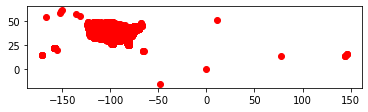

In [24]:
#ax = df[df.continent == 'North America'].plot(
#    color='white', edgecolor='black')

gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

print(gdf.head())

# We restrict to South America.

# We can now plot our ``GeoDataFrame``.
gdf.plot(color='red')

Verificando rapidamente número de acidentes por estado:

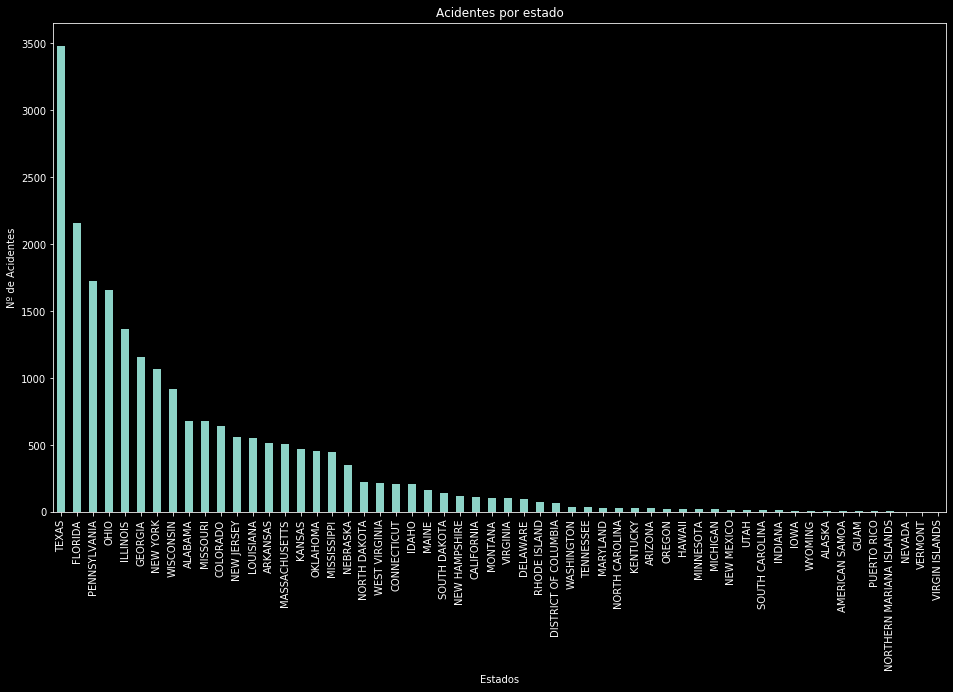

In [31]:

plt.ylabel("Nº de Acidentes")
plt.xlabel("Estados")
plt.title("Acidentes por estado")
plt.rcParams["figure.figsize"] = [16,9]

df['State'].value_counts().plot(kind="bar")

Verificando a distribuição de acidentes por parte do corpo


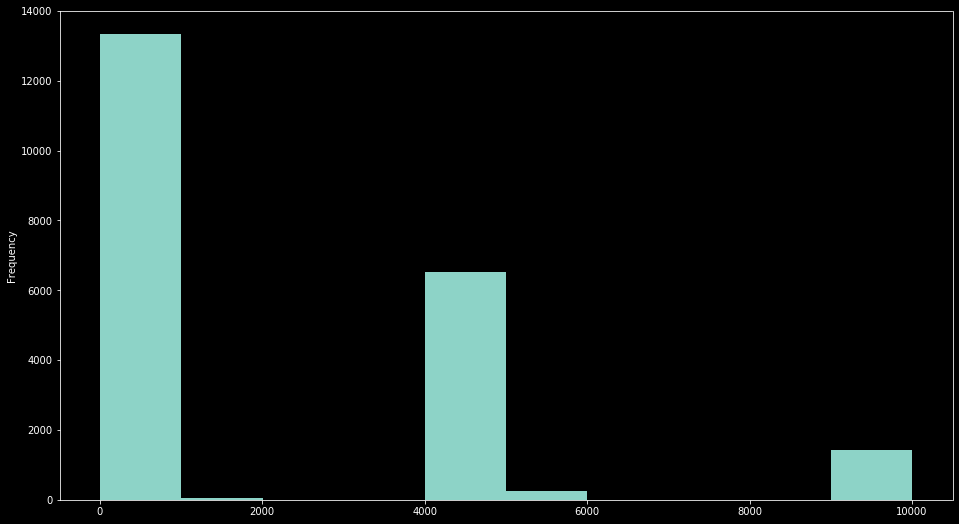

In [33]:
df['Part of Body'].plot(kind="hist")

In [27]:
pandas_profiling.ProfileReport(df)


NameError: name 'pandas_profiling' is not defined

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [ ]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



In [ ]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# Segundo par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

In [ ]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.

### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*